In [68]:
import pandas as pd

import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [69]:
df = pd.read_csv('../data/model_data/salaries_with_stats.csv')
df.head(2)

,player,nhl_api_id_number,team,cap hit %,aav,length,weight,height,drafted,slide cand.,...,shifts,shortHandedGoals,shortHandedPoints,shortHandedTimeOnIce,shotPct,shots,timeOnIce,position_F,shoots_Right,contract_is_two_way
0,Connor McDavid,8478402,EDM,16.7,12500000.0,8,193,185,1,0,...,3028.0,1.0,2.0,100.966667,27.2,356.0,2582.600000,1,0,0
1,Artemi Panarin,8478550,NYR,14.3,11642857.0,7,168,180,218,0,...,7328.0,0.0,0.0,8.766667,57.2,817.0,6277.516667,1,1,0


In [70]:
df = df.fillna(0)

In [71]:
y = df['cap hit %']

feature_cols = list(df.columns[5:])
X = df[feature_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [72]:
rfreg = RandomForestRegressor()

rfreg.fit(X_train, y_train)

score = rfreg.score(X_test, y_test)
mse = mean_squared_error(y_test, rfreg.predict(X_test))

print(f'score ---> {score}')
print(f'RMSE ----> {np.sqrt(score)}')

score ---> 0.8836849763380826
RMSE ----> 0.9400451990931514


In [73]:
rfreg = RandomForestRegressor()

rfreg.fit(X, y)

df['preds'] = rfreg.predict(X)

In [74]:
import matplotlib.pyplot as plt

In [75]:
import seaborn as sns

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


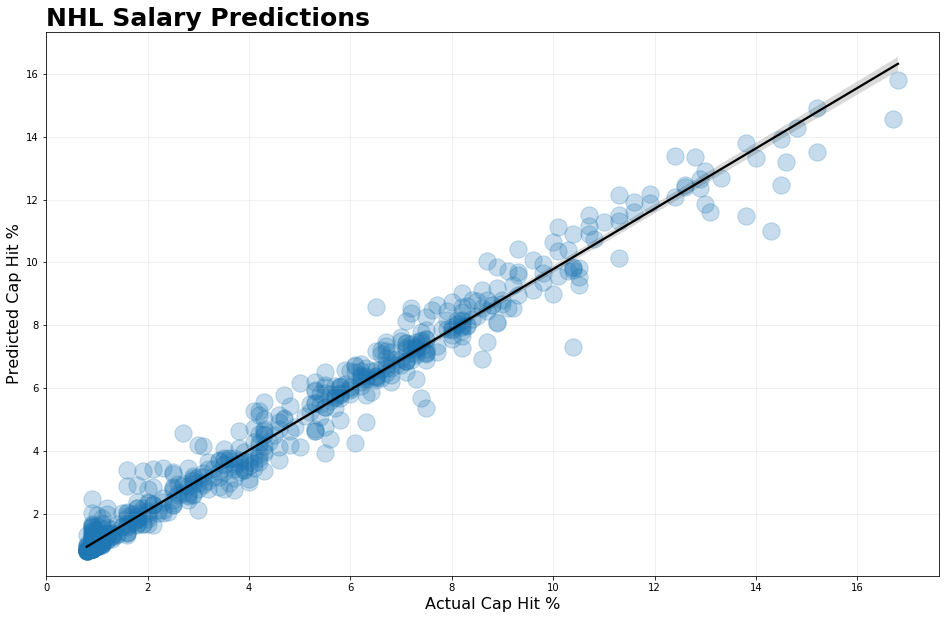

In [76]:
x = list(df['cap hit %'])
y = list(df['preds'])

plt.figure(figsize=(16,10))

plt.title('NHL Salary Predictions', 
          fontsize=25, 
          loc='left', 
          family='sans-serif',
          weight='bold')

sns.regplot(x,
            y,
            truncate=True,
            scatter_kws={'s':300, 'alpha':.25},
            line_kws={'color':'black'})


plt.xlabel('Actual Cap Hit %', fontsize=16)
plt.ylabel('Predicted Cap Hit %', fontsize=16)

plt.grid(alpha=.25)

plt.savefig('salary_preds.png', dpi=400, bbox_inches='tight')

plt.show()

In [77]:
dif = df[['player', 'cap hit %', 'preds']]

dif['delta'] = dif['preds'] - dif['cap hit %']

dif['delta%'] = dif['delta'] / dif['cap hit %']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [78]:
dif.sort_values('delta%').head(10)

,player,cap hit %,preds,delta,delta%
166,Wayne Simmonds,6.1,4.26,-1.84,-0.301639
21,Sebastian Aho,10.4,7.31,-3.09,-0.297115
336,Alex Iafallo,3.0,2.13,-0.87,-0.290000
84,Alexander Edler,7.5,5.37,-2.13,-0.284000
198,Cody Ceci,5.5,3.95,-1.55,-0.281818
304,Neal Pionk,3.7,2.77,-0.93,-0.251351
286,Darnell Nurse,4.0,3.02,-0.98,-0.245000
92,Timo Meier,7.4,5.69,-1.71,-0.231081
1,Artemi Panarin,14.3,11.00,-3.30,-0.230769
284,Travis Sanheim,4.0,3.12,-0.88,-0.220000


In [79]:
dif.sort_values('delta%', ascending=False).head(10)

,player,cap hit %,preds,delta,delta%
670,Jason Spezza,0.9,2.47,1.57,1.744444
624,Cory Conacher,0.9,2.04,1.14,1.266667
423,Dan Hamhuis,1.6,3.38,1.78,1.112500
486,Christian Folin,1.0,1.97,0.97,0.970000
678,Doyle Somerby,0.9,1.68,0.78,0.866667
588,Dominik Masin,0.9,1.65,0.75,0.833333
445,Nathan Beaulieu,1.2,2.18,0.98,0.816667
426,Colton Sceviour,1.6,2.90,1.30,0.812500
504,Nic Dowd,0.9,1.61,0.71,0.788889
404,Scott Mayfield,1.9,3.37,1.47,0.773684


In [85]:
pd.DataFrame(index=feature_cols,
             data=rfreg.feature_importances_).sort_values(0, ascending=False)

,0
length,0.774899
powerPlayPoints,0.055034
points,0.024907
assists,0.017867
drafted,0.016455
powerPlayTimeOnIce,0.014462
powerPlayGoals,0.008417
plusMinus,0.008226
hits,0.007284
signing age,0.006275
